In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
housing_data = pd.read_csv('datasets/housing.csv') #Previously explored housing dataset
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12198,-117.25,33.65,10.0,1652.0,316.0,725.0,233.0,3.5125,155600.0,<1H OCEAN
8349,-118.33,33.94,31.0,3757.0,1102.0,3288.0,964.0,1.9309,137500.0,<1H OCEAN
19519,-121.00,37.64,43.0,311.0,95.0,293.0,94.0,1.2902,67500.0,INLAND
11448,-117.98,33.68,14.0,3396.0,477.0,1542.0,472.0,7.3982,369100.0,<1H OCEAN
12049,-117.56,33.88,36.0,838.0,210.0,722.0,180.0,2.4861,96200.0,INLAND


In [7]:
housing_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [11]:
# As previously explored there is a cap of 500001 in median housing value. Dropping those columns
housing_data.dropna(inplace=True)
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [12]:
housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index, inplace=True)

In [13]:
housing_data.shape

(19475, 10)

In [14]:
#housing_data_corr = housing_data.corr()
#fig, ax = plt.subplots(figsize=(10,7))
#sns.heatmap(housing_data_corr, annot=True)

In [15]:
housing_data['ocean_proximity'].value_counts().sort_values()

ISLAND           5
NEAR BAY      2077
NEAR OCEAN    2419
INLAND        6469
<1H OCEAN     8505
Name: ocean_proximity, dtype: int64

In [17]:
housing_data = pd.get_dummies(housing_data,columns=['ocean_proximity']) # One hot encoding
housing_data.shape

(19475, 14)

In [18]:
housing_data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1842,-122.29,37.91,40.0,2085.0,329.0,796.0,339.0,5.5357,273700.0,0,0,0,1,0
17038,-122.25,37.49,40.0,2709.0,521.0,1156.0,510.0,4.6366,395500.0,0,0,0,0,1
13684,-117.24,34.15,23.0,3847.0,608.0,1621.0,630.0,4.6111,128400.0,0,1,0,0,0
13994,-116.99,34.88,23.0,6060.0,1165.0,2920.0,1072.0,3.1528,69000.0,0,1,0,0,0
11795,-121.39,38.85,19.0,3568.0,646.0,1714.0,590.0,4.0862,162700.0,0,1,0,0,0
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,1,0,0,0,0
4572,-118.27,34.07,32.0,1657.0,579.0,2071.0,598.0,2.1135,152500.0,1,0,0,0,0
12239,-116.93,33.73,13.0,3603.0,573.0,1644.0,515.0,4.0433,132300.0,0,1,0,0,0
17957,-121.98,37.33,25.0,3223.0,612.0,1529.0,602.0,5.1210,287600.0,1,0,0,0,0
16079,-122.49,37.74,48.0,1186.0,213.0,487.0,207.0,3.8333,340800.0,0,0,0,0,1


In [19]:
X = housing_data.drop(['median_house_value'], axis=1)
Y = housing_data['median_house_value']

In [29]:
# Spliting the data into test and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
x_train.shape, y_train.shape

((15580, 13), (15580,))

In [31]:
x_test.shape, y_test.shape

((3895, 13), (3895,))

### Budiling a simple linear model using one variable

In [41]:
from sklearn.linear_model import LinearRegression
simple_linear_model = LinearRegression(normalize=True).fit(x_train[['median_income']], y_train)
print('Simple Linear Model - Training Score: ', simple_linear_model.score(x_train[['median_income']], y_train))

from sklearn.metrics import r2_score
y_pred = simple_linear_model.predict(x_test[['median_income']])
print('Simple Linear Model - Test Score: ', r2_score(y_test, y_pred))

Simple Linear Model - Training Score:  0.40867772283540893
Simple Linear Model - Test Score:  0.4303033682833366


In [43]:
df_actual_pred = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df_actual_pred_sample = df_actual_pred.sample(100)
df_actual_pred_sample = df_actual_pred_sample.reset_index()

In [44]:
df_actual_pred_sample.head()

,index,actual,predicted
0,15464,214500.0,192139.659667
1,9810,500000.0,315576.244285
2,1103,73000.0,137648.417504
3,18123,242200.0,233899.042986
4,6302,191100.0,150431.983366


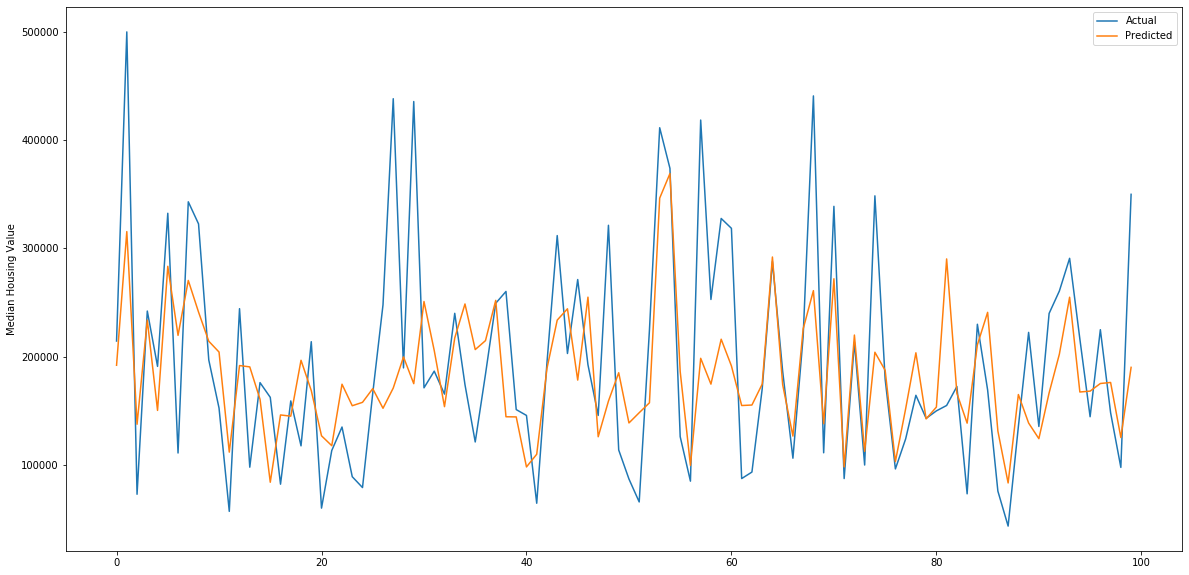

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df_actual_pred_sample['actual'], label='Actual')
plt.plot(df_actual_pred_sample['predicted'], label='Predicted')
plt.ylabel('Median Housing Value')
plt.legend()
plt.show()

### Building Linear Model using all variables

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True).fit(x_train, y_train)
print('Linear Model - Training Score:',lm.score(x_train, y_train))
y_pred = lm.predict(x_test)

from sklearn.metrics import r2_score
print('Linear Model - Test Score:', r2_score(y_test, y_pred))

Linear Model - Training Score: 0.6116720752299365
Linear Model - Test Score: 0.617059486393817


In [50]:
coef = pd.Series(lm.coef_, x_train.columns).sort_values()
print(coef)

ocean_proximity_INLAND       -1.801691e+18
ocean_proximity_NEAR BAY     -1.801691e+18
ocean_proximity_<1H OCEAN    -1.801691e+18
ocean_proximity_NEAR OCEAN   -1.801691e+18
ocean_proximity_ISLAND       -1.801691e+18
longitude                    -2.493167e+04
latitude                     -2.277947e+04
population                   -2.994667e+01
total_rooms                  -7.646540e+00
households                    3.823703e+01
total_bedrooms                9.911197e+01
housing_median_age            9.223429e+02
median_income                 3.854391e+04
dtype: float64


In [51]:
df_actual_pred = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df_actual_pred_sample = df_actual_pred.sample(100)
df_actual_pred_sample = df_actual_pred_sample.reset_index()

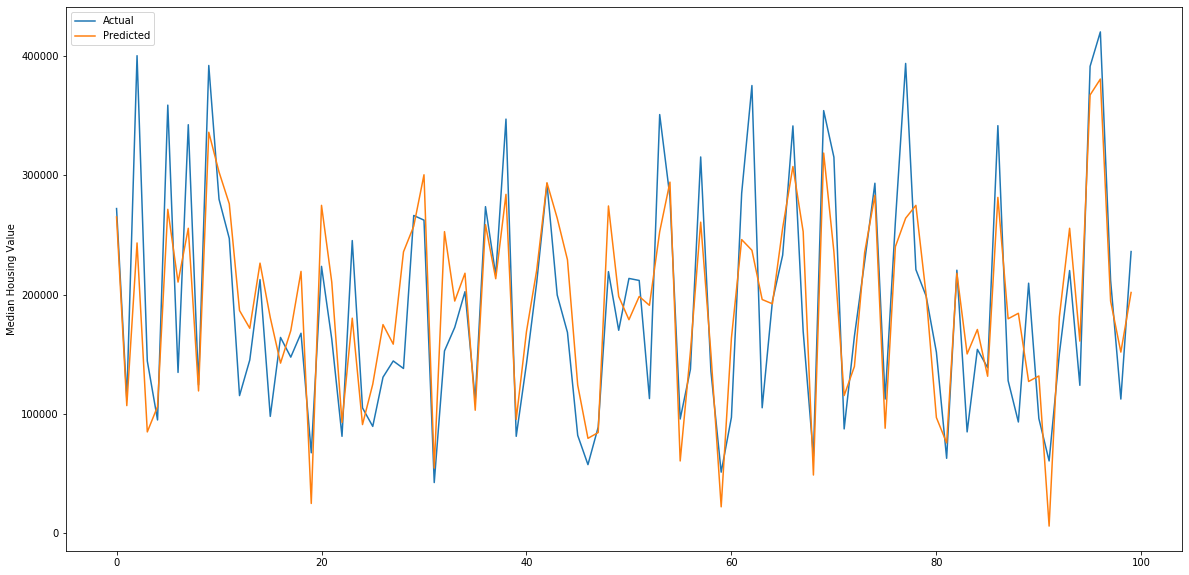

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df_actual_pred_sample['actual'], label='Actual')
plt.plot(df_actual_pred_sample['predicted'], label='Predicted')
plt.ylabel('Median Housing Value')
plt.legend()
plt.show()